In [197]:
from selenium import webdriver
import time
 
# 크롬 웹브라우저 실행
path = "../files/chromedriver.exe"
 
driver = webdriver.Chrome(path)
url_list = []
content_list = ""
text = "아동복"
content_list = []

for i in range(1, 100):  # 5페이지까지의 블로그 내용을 읽어옴
    url = 'https://section.blog.naver.com/Search/Post.nhn?pageNo='+ str(i) + '&rangeType=ALL&orderBy=sim&keyword=' + text
    driver.get(url)
    time.sleep(0.5)
    print('-----Searching page :', i,'-----')
    for j in range(1, 8): # 각 블로그 주소 저장
        titles = driver.find_element_by_xpath('/html/body/ui-view/div/main/div/div/section/div[2]/div['+str(j)+']/div/div[1]/div[1]/a[1]')
        title = titles.get_attribute('href')
        url_list.append(title)
        if j/7 == 0:
            print('Crawling Data - page ',j, ' Done')
     
print("Collect URL Done. Start Data Crawling")
 
for url in url_list: # 수집한 url 만큼 반복
    driver.get(url) # 해당 url로 이동
 
    driver.switch_to.frame('mainFrame')
    overlays = ".se-component.se-text.se-l-default" # 내용 크롤링
    contents = driver.find_elements_by_css_selector(overlays)
     
    for content in contents:
        content_list.append(content.text) # content_list 라는 값에 + 하면서 점점 누적
print("Data Crawling Done")

-----Searching page : 1 -----
-----Searching page : 2 -----
-----Searching page : 3 -----
-----Searching page : 4 -----
-----Searching page : 5 -----
-----Searching page : 6 -----
-----Searching page : 7 -----
-----Searching page : 8 -----
-----Searching page : 9 -----
-----Searching page : 10 -----
-----Searching page : 11 -----
-----Searching page : 12 -----
-----Searching page : 13 -----
-----Searching page : 14 -----
-----Searching page : 15 -----
-----Searching page : 16 -----
-----Searching page : 17 -----
-----Searching page : 18 -----
-----Searching page : 19 -----
-----Searching page : 20 -----
-----Searching page : 21 -----
-----Searching page : 22 -----
-----Searching page : 23 -----
-----Searching page : 24 -----
-----Searching page : 25 -----
-----Searching page : 26 -----
-----Searching page : 27 -----
-----Searching page : 28 -----
-----Searching page : 29 -----
-----Searching page : 30 -----
-----Searching page : 31 -----
-----Searching page : 32 -----
-----Searching pa

In [201]:
df = pd.DataFrame(content_list)
df

,0
0,
1,"꿀팁 대방출 \n 쇼핑천국 남대문 아동복\n- 글, 사진 by Loti -\n한번..."
2,시장이라 공영주차장 근처에 없어요.\n주차 꿀팁을 소개하자면\n신세계 백화점 (본점...
3,차가 편하긴 하지만\n여유 있게 둘러보고 싶을 때는\n지하철을 이용해서 남대문시장에...
4,"남대문아동복 도매시장은\n쇼핑 지옥, 개미지옥이 따로 없습니다.\n예쁜 아동복이 정..."
...,...
9829,가디건 카라는 너무나 제 스타일 ㅋㅋ\n맘 가디건을 사고싶은 마음이 드릉드릉하네요 ㅋㅋ
9830,가디건은 금사가 섞여서 \n반짝거리는게 실물이 훨씬 이쁘고\n 겨울용은 아니고 얇은...
9831,치마는 얼마전 허리밴드에서 \n이염된다는 글을 봐서 걱정이 되는데..\n봉주르 다이...
9832,"봉주르 가디건 사이즈 6y, 치마는 4y로 입었는데\n가디건은 제일 아랫쪽 단추를 ..."


In [200]:
df.to_csv('../data/아동복_네이버블로그.csv', encoding='utf-8-sig')

In [211]:
df = pd.read_csv('../data/아동복_네이버블로그.csv', index_col=0)
df.columns = ['text']
df.dropna(inplace=True)
df.head()

,text
1,"꿀팁 대방출 \n 쇼핑천국 남대문 아동복\n- 글, 사진 by Loti -\n한번..."
2,시장이라 공영주차장 근처에 없어요.\n주차 꿀팁을 소개하자면\n신세계 백화점 (본점...
3,차가 편하긴 하지만\n여유 있게 둘러보고 싶을 때는\n지하철을 이용해서 남대문시장에...
4,"남대문아동복 도매시장은\n쇼핑 지옥, 개미지옥이 따로 없습니다.\n예쁜 아동복이 정..."
5,"일요일, 공휴일 휴무라는 말도 있는데요\n제가 방문했을 당시에는\n추석 연휴에도 다..."


In [213]:
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

okt = Okt()

word_list = []

for i in df.text:
    word_list.append(i)
    
sentences_tag = []

for sentence in word_list:
    morph = okt.pos(sentence)
    sentences_tag.append(morph)
    
noun_list = []
for sentence in sentences_tag:
    for word, tag in sentence:
        if tag in ["Noun"]:
            noun_list.append(word)
            
noun_list = [n for n in noun_list if len(n) > 1]

counts = Counter(noun_list)

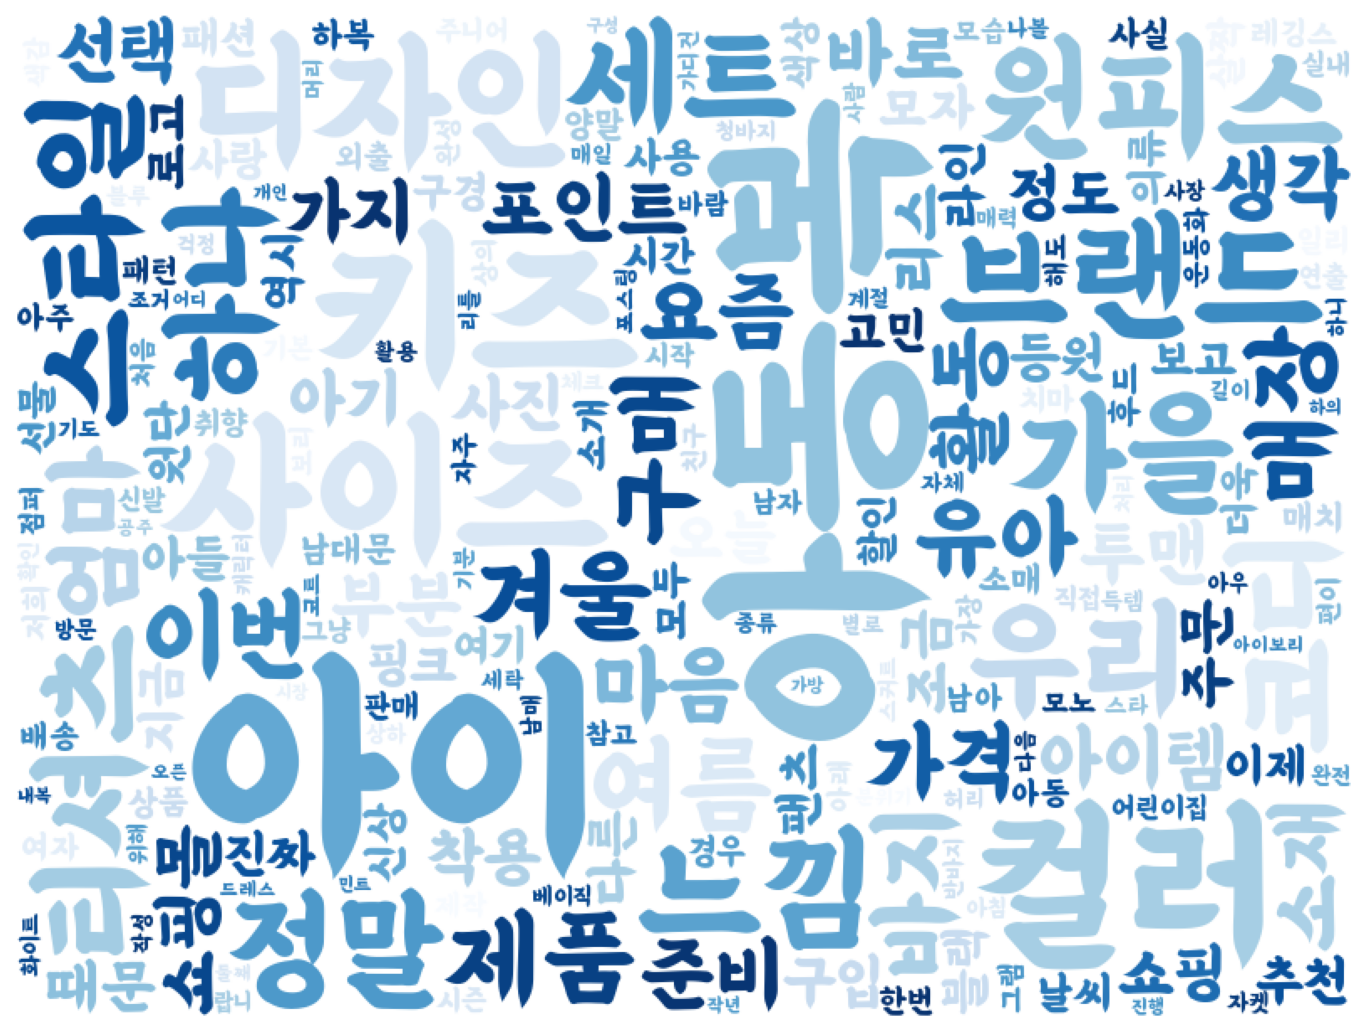

In [214]:
wordcloud = WordCloud(font_path="C:/Users/Kim/Downloads/BMEULJIROTTF.ttf",
                     background_color='white',width=800, height=600,
                     max_font_size=150,
                     colormap='Blues')
#print(dict(tags))

cloud = wordcloud.generate_from_frequencies(counts)
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(cloud) # 마스크용 이미지의 색으로 워드클라우드 생성
plt.show()

# 최적의 토픽갯수

In [216]:
from gensim.models.word2vec import Word2Vec

# 데이터 전처리
df = df.dropna(how = 'any')
df['text'] = df['text'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []

for sentence in df['text']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('../data/아동복_블로그_tokenized.csv')

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  """


In [217]:
# 토큰화 예시

pd.DataFrame(tokenized_data).head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,꿀팁,방출,쇼핑,천국,남대문,아동복,사진,한번,디디,남대문,...,None,None,None,None,None,None,None,None,None,None
1,시장,공영,주차장,근처,주차,꿀팁,소개,신세계,백화점,본점,...,None,None,None,None,None,None,None,None,None,None
2,여유,지하철,이용,남대문시장,저희,서울,역행,경의선,진짜,도착,...,None,None,None,None,None,None,None,None,None,None
3,남대문,아동복,도매시장,쇼핑,지옥,개미지옥,아동복,정말,동안,사이즈,...,None,None,None,None,None,None,None,None,None,None
4,일요일,공휴일,휴무,방문,당시,추석,연휴,영업,주로,평일,...,None,None,None,None,None,None,None,None,None,None


# 토픽 갯수별 응집도 구하기

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████████████████████████████████████████████████████████████████████| 8911/8911 [00:00<00:00, 131305.46it/s]
2021-11-03 22:17:20,852 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2021-11-03 22:17:21,364 : INFO : built Dictionary(18692 unique tokens: ['', '0', '1', '10', '100']...) from 8911 documents (total 2691122 corpus positions)
2021-11-03 22:17:21,392 : INFO : discarding 17034 tokens: [('', 8910), ('0', 2), ('1', 2), ('10', 2), ('100', 2), ('101', 2), ('102', 2), ('103', 2), ('104', 2), ('105', 2)]...
2021-11-03 22:17:21,393 : INFO : keeping 1658 tokens which were in no less than 10 and

Number of unique tokens: 1658
Number of documents: 8911


2021-11-03 22:17:22,933 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:17:22,935 : INFO : topic #0 (0.500): 0.009*"준비" + 0.009*"리스" + 0.008*"구매" + 0.008*"투맨" + 0.008*"아이템" + 0.006*"생각" + 0.006*"착용" + 0.006*"모노" + 0.006*"그램" + 0.006*"아기"
2021-11-03 22:17:22,936 : INFO : topic #1 (0.500): 0.008*"소재" + 0.008*"투맨" + 0.007*"매장" + 0.007*"리스" + 0.006*"모노" + 0.006*"모자" + 0.006*"그램" + 0.006*"양말" + 0.006*"촬영" + 0.006*"사랑"
2021-11-03 22:17:22,937 : INFO : topic diff=1.310196, rho=1.000000
2021-11-03 22:17:22,938 : INFO : PROGRESS: pass 0, at document #4000/8911
2021-11-03 22:17:23,720 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:17:23,721 : INFO : topic #0 (0.500): 0.008*"구매" + 0.008*"아기" + 0.007*"준비" + 0.007*"가격" + 0.007*"생각" + 0.006*"하복" + 0.006*"리스" + 0.006*"가지" + 0.006*"바지" + 0.006*"착용"
2021-11-03 22:17:23,722 : INFO : topic #1 (0.500): 0.013*"매장" + 0.007*"사랑" + 0.007*"쇼핑몰" + 0.006*"소재" + 0.006*"모자" + 0.00

2021-11-03 22:17:32,685 : INFO : 47 batches submitted to accumulate stats from 3008 documents (580544 virtual)
2021-11-03 22:17:32,704 : INFO : 48 batches submitted to accumulate stats from 3072 documents (592896 virtual)
2021-11-03 22:17:32,715 : INFO : 49 batches submitted to accumulate stats from 3136 documents (605248 virtual)
2021-11-03 22:17:32,762 : INFO : 50 batches submitted to accumulate stats from 3200 documents (617600 virtual)
2021-11-03 22:17:32,809 : INFO : 51 batches submitted to accumulate stats from 3264 documents (629952 virtual)
2021-11-03 22:17:32,826 : INFO : 52 batches submitted to accumulate stats from 3328 documents (642304 virtual)
2021-11-03 22:17:32,833 : INFO : 53 batches submitted to accumulate stats from 3392 documents (654656 virtual)
2021-11-03 22:17:32,843 : INFO : 54 batches submitted to accumulate stats from 3456 documents (667008 virtual)
2021-11-03 22:17:32,866 : INFO : 55 batches submitted to accumulate stats from 3520 documents (679360 virtual)
2

2021-11-03 22:17:35,867 : INFO : topic #6 (0.125): 0.013*"투맨" + 0.011*"소재" + 0.010*"기모" + 0.010*"창업" + 0.010*"남대문" + 0.010*"다른" + 0.009*"패션" + 0.009*"생각" + 0.008*"팬츠" + 0.008*"포인트"
2021-11-03 22:17:35,868 : INFO : topic #5 (0.125): 0.022*"주문" + 0.013*"선택" + 0.011*"정도" + 0.010*"쇼핑몰" + 0.009*"양말" + 0.009*"조금" + 0.009*"가지" + 0.008*"구매" + 0.007*"남아" + 0.007*"상하"
2021-11-03 22:17:35,869 : INFO : topic #7 (0.125): 0.012*"핑크" + 0.012*"제작" + 0.011*"원단" + 0.010*"남대문" + 0.010*"상가" + 0.010*"리스" + 0.010*"로고" + 0.009*"프릴" + 0.008*"사용" + 0.008*"소재"
2021-11-03 22:17:35,870 : INFO : topic #2 (0.125): 0.041*"매장" + 0.010*"운동화" + 0.010*"소재" + 0.009*"포스팅" + 0.009*"사진" + 0.008*"블랙" + 0.008*"아들" + 0.008*"생각" + 0.008*"조거" + 0.007*"작성"
2021-11-03 22:17:35,870 : INFO : topic diff=0.466125, rho=0.577350
2021-11-03 22:17:35,871 : INFO : PROGRESS: pass 0, at document #8000/8911
2021-11-03 22:17:36,419 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:17:36,421 : INFO : topi

2021-11-03 22:17:43,761 : INFO : 45 batches submitted to accumulate stats from 2880 documents (555840 virtual)
2021-11-03 22:17:43,777 : INFO : 46 batches submitted to accumulate stats from 2944 documents (568192 virtual)
2021-11-03 22:17:43,830 : INFO : 47 batches submitted to accumulate stats from 3008 documents (580544 virtual)
2021-11-03 22:17:43,838 : INFO : 48 batches submitted to accumulate stats from 3072 documents (592896 virtual)
2021-11-03 22:17:43,855 : INFO : 49 batches submitted to accumulate stats from 3136 documents (605248 virtual)
2021-11-03 22:17:43,873 : INFO : 50 batches submitted to accumulate stats from 3200 documents (617600 virtual)
2021-11-03 22:17:43,881 : INFO : 51 batches submitted to accumulate stats from 3264 documents (629952 virtual)
2021-11-03 22:17:43,922 : INFO : 52 batches submitted to accumulate stats from 3328 documents (642304 virtual)
2021-11-03 22:17:43,930 : INFO : 53 batches submitted to accumulate stats from 3392 documents (654656 virtual)
2

2021-11-03 22:17:45,465 : INFO : 119 batches submitted to accumulate stats from 7616 documents (1461975 virtual)
2021-11-03 22:17:45,729 : INFO : 7 accumulators retrieved from output queue
2021-11-03 22:17:45,761 : INFO : accumulated word occurrence stats for 1461975 virtual documents
2021-11-03 22:17:46,063 : INFO : using symmetric alpha at 0.07142857142857142
2021-11-03 22:17:46,064 : INFO : using symmetric eta at 0.07142857142857142
2021-11-03 22:17:46,064 : INFO : using serial LDA version on this node
2021-11-03 22:17:46,068 : INFO : running online (single-pass) LDA training, 14 topics, 1 passes over the supplied corpus of 8911 documents, updating model once every 2000 documents, evaluating perplexity every 8911 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-03 22:17:46,068 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-11-03 22:17:46,069 : INFO : PROGRESS: pass 0, 

2021-11-03 22:17:54,858 : INFO : 13 batches submitted to accumulate stats from 832 documents (160576 virtual)
2021-11-03 22:17:54,865 : INFO : 14 batches submitted to accumulate stats from 896 documents (172928 virtual)
2021-11-03 22:17:54,872 : INFO : 15 batches submitted to accumulate stats from 960 documents (185280 virtual)
2021-11-03 22:17:54,880 : INFO : 16 batches submitted to accumulate stats from 1024 documents (197632 virtual)
2021-11-03 22:17:54,900 : INFO : 17 batches submitted to accumulate stats from 1088 documents (209984 virtual)
2021-11-03 22:17:54,912 : INFO : 18 batches submitted to accumulate stats from 1152 documents (222336 virtual)
2021-11-03 22:17:54,928 : INFO : 19 batches submitted to accumulate stats from 1216 documents (234688 virtual)
2021-11-03 22:17:54,936 : INFO : 20 batches submitted to accumulate stats from 1280 documents (247040 virtual)
2021-11-03 22:17:54,964 : INFO : 21 batches submitted to accumulate stats from 1344 documents (259392 virtual)
2021

2021-11-03 22:17:56,514 : INFO : 87 batches submitted to accumulate stats from 5568 documents (1074624 virtual)
2021-11-03 22:17:56,544 : INFO : 88 batches submitted to accumulate stats from 5632 documents (1086976 virtual)
2021-11-03 22:17:56,558 : INFO : 89 batches submitted to accumulate stats from 5696 documents (1099328 virtual)
2021-11-03 22:17:56,604 : INFO : 90 batches submitted to accumulate stats from 5760 documents (1111680 virtual)
2021-11-03 22:17:56,612 : INFO : 91 batches submitted to accumulate stats from 5824 documents (1124032 virtual)
2021-11-03 22:17:56,636 : INFO : 92 batches submitted to accumulate stats from 5888 documents (1136384 virtual)
2021-11-03 22:17:56,656 : INFO : 93 batches submitted to accumulate stats from 5952 documents (1148736 virtual)
2021-11-03 22:17:56,694 : INFO : 94 batches submitted to accumulate stats from 6016 documents (1161088 virtual)
2021-11-03 22:17:56,716 : INFO : 95 batches submitted to accumulate stats from 6080 documents (1173440 v

2021-11-03 22:17:59,953 : INFO : topic diff=0.319247, rho=0.577350
2021-11-03 22:17:59,954 : INFO : PROGRESS: pass 0, at document #8000/8911
2021-11-03 22:18:00,423 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:18:00,427 : INFO : topic #15 (0.050): 0.025*"추천" + 0.018*"촬영" + 0.015*"모자" + 0.012*"여유" + 0.011*"마음" + 0.011*"재고" + 0.011*"정도" + 0.010*"하우스" + 0.010*"스튜디오" + 0.010*"착용"
2021-11-03 22:18:00,428 : INFO : topic #12 (0.050): 0.023*"소재" + 0.020*"색상" + 0.018*"가지" + 0.015*"포인트" + 0.014*"블랙" + 0.013*"기모" + 0.013*"체크" + 0.013*"활동" + 0.013*"화이트" + 0.012*"투맨"
2021-11-03 22:18:00,428 : INFO : topic #16 (0.050): 0.021*"쇼핑몰" + 0.019*"상품" + 0.016*"오늘" + 0.013*"날씨" + 0.012*"신상" + 0.010*"품절" + 0.010*"아기" + 0.010*"구입" + 0.009*"아동" + 0.009*"매장"
2021-11-03 22:18:00,429 : INFO : topic #1 (0.050): 0.045*"로고" + 0.026*"바람막이" + 0.020*"그대로" + 0.019*"마음" + 0.018*"재질" + 0.014*"완전" + 0.014*"소재" + 0.013*"활동" + 0.011*"가방" + 0.011*"볼륨"
2021-11-03 22:18:00,430 : INFO 

2021-11-03 22:18:07,964 : INFO : 52 batches submitted to accumulate stats from 3328 documents (642304 virtual)
2021-11-03 22:18:07,985 : INFO : 53 batches submitted to accumulate stats from 3392 documents (654656 virtual)
2021-11-03 22:18:07,993 : INFO : 54 batches submitted to accumulate stats from 3456 documents (667008 virtual)
2021-11-03 22:18:08,001 : INFO : 55 batches submitted to accumulate stats from 3520 documents (679360 virtual)
2021-11-03 22:18:08,069 : INFO : 56 batches submitted to accumulate stats from 3584 documents (691712 virtual)
2021-11-03 22:18:08,077 : INFO : 57 batches submitted to accumulate stats from 3648 documents (704064 virtual)
2021-11-03 22:18:08,111 : INFO : 58 batches submitted to accumulate stats from 3712 documents (716416 virtual)
2021-11-03 22:18:08,119 : INFO : 59 batches submitted to accumulate stats from 3776 documents (728768 virtual)
2021-11-03 22:18:08,128 : INFO : 60 batches submitted to accumulate stats from 3840 documents (741120 virtual)
2

2021-11-03 22:18:09,757 : INFO : 126 batches submitted to accumulate stats from 8064 documents (1555773 virtual)
2021-11-03 22:18:10,165 : INFO : 7 accumulators retrieved from output queue
2021-11-03 22:18:10,255 : INFO : accumulated word occurrence stats for 1555773 virtual documents
2021-11-03 22:18:10,959 : INFO : using symmetric alpha at 0.038461538461538464
2021-11-03 22:18:10,960 : INFO : using symmetric eta at 0.038461538461538464
2021-11-03 22:18:10,960 : INFO : using serial LDA version on this node
2021-11-03 22:18:10,965 : INFO : running online (single-pass) LDA training, 26 topics, 1 passes over the supplied corpus of 8911 documents, updating model once every 2000 documents, evaluating perplexity every 8911 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-03 22:18:10,966 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2021-11-03 22:18:10,967 : INFO : PROGRESS: pass 0

2021-11-03 22:18:19,571 : INFO : 13 batches submitted to accumulate stats from 832 documents (160576 virtual)
2021-11-03 22:18:19,579 : INFO : 14 batches submitted to accumulate stats from 896 documents (172928 virtual)
2021-11-03 22:18:19,606 : INFO : 15 batches submitted to accumulate stats from 960 documents (185280 virtual)
2021-11-03 22:18:19,631 : INFO : 16 batches submitted to accumulate stats from 1024 documents (197632 virtual)
2021-11-03 22:18:19,647 : INFO : 17 batches submitted to accumulate stats from 1088 documents (209984 virtual)
2021-11-03 22:18:19,655 : INFO : 18 batches submitted to accumulate stats from 1152 documents (222336 virtual)
2021-11-03 22:18:19,666 : INFO : 19 batches submitted to accumulate stats from 1216 documents (234688 virtual)
2021-11-03 22:18:19,684 : INFO : 20 batches submitted to accumulate stats from 1280 documents (247040 virtual)
2021-11-03 22:18:19,706 : INFO : 21 batches submitted to accumulate stats from 1344 documents (259392 virtual)
2021

2021-11-03 22:18:21,327 : INFO : 87 batches submitted to accumulate stats from 5568 documents (1074624 virtual)
2021-11-03 22:18:21,369 : INFO : 88 batches submitted to accumulate stats from 5632 documents (1086976 virtual)
2021-11-03 22:18:21,376 : INFO : 89 batches submitted to accumulate stats from 5696 documents (1099328 virtual)
2021-11-03 22:18:21,385 : INFO : 90 batches submitted to accumulate stats from 5760 documents (1111680 virtual)
2021-11-03 22:18:21,412 : INFO : 91 batches submitted to accumulate stats from 5824 documents (1124032 virtual)
2021-11-03 22:18:21,450 : INFO : 92 batches submitted to accumulate stats from 5888 documents (1136384 virtual)
2021-11-03 22:18:21,457 : INFO : 93 batches submitted to accumulate stats from 5952 documents (1148736 virtual)
2021-11-03 22:18:21,483 : INFO : 94 batches submitted to accumulate stats from 6016 documents (1161088 virtual)
2021-11-03 22:18:21,537 : INFO : 95 batches submitted to accumulate stats from 6080 documents (1173440 v

2021-11-03 22:18:25,456 : INFO : topic #8 (0.031): 0.021*"투맨" + 0.021*"리스" + 0.020*"가방" + 0.019*"후드" + 0.017*"활동" + 0.017*"가디건" + 0.016*"소재" + 0.016*"패밀리" + 0.015*"자켓" + 0.014*"치마"
2021-11-03 22:18:25,457 : INFO : topic #14 (0.031): 0.050*"프릴" + 0.028*"제작" + 0.027*"가득" + 0.026*"자체" + 0.024*"바람막이" + 0.020*"디자이너" + 0.019*"로고" + 0.018*"러블" + 0.012*"소재" + 0.012*"직접"
2021-11-03 22:18:25,458 : INFO : topic #9 (0.031): 0.021*"상가" + 0.018*"생산" + 0.017*"요즘" + 0.017*"소품" + 0.017*"여기" + 0.016*"구매" + 0.015*"쇼핑몰" + 0.015*"쇼핑" + 0.014*"국내" + 0.014*"문의"
2021-11-03 22:18:25,458 : INFO : topic #17 (0.031): 0.033*"학기" + 0.021*"베이비" + 0.018*"오늘" + 0.016*"벌써" + 0.016*"젤리" + 0.016*"곰돌이" + 0.012*"자기" + 0.012*"취향" + 0.011*"모노" + 0.011*"이미지"
2021-11-03 22:18:25,459 : INFO : topic #26 (0.031): 0.033*"코트" + 0.019*"막내" + 0.015*"마음" + 0.015*"스커트" + 0.014*"한복" + 0.013*"레깅스" + 0.012*"소매" + 0.011*"조금" + 0.011*"밴드" + 0.011*"사실"
2021-11-03 22:18:25,460 : INFO : topic diff=0.278842, rho=0.577350
2021-11-03 22:18:25,461

2021-11-03 22:18:33,289 : INFO : 43 batches submitted to accumulate stats from 2752 documents (531136 virtual)
2021-11-03 22:18:33,297 : INFO : 44 batches submitted to accumulate stats from 2816 documents (543488 virtual)
2021-11-03 22:18:33,308 : INFO : 45 batches submitted to accumulate stats from 2880 documents (555840 virtual)
2021-11-03 22:18:33,319 : INFO : 46 batches submitted to accumulate stats from 2944 documents (568192 virtual)
2021-11-03 22:18:33,365 : INFO : 47 batches submitted to accumulate stats from 3008 documents (580544 virtual)
2021-11-03 22:18:33,390 : INFO : 48 batches submitted to accumulate stats from 3072 documents (592896 virtual)
2021-11-03 22:18:33,428 : INFO : 49 batches submitted to accumulate stats from 3136 documents (605248 virtual)
2021-11-03 22:18:33,456 : INFO : 50 batches submitted to accumulate stats from 3200 documents (617600 virtual)
2021-11-03 22:18:33,471 : INFO : 51 batches submitted to accumulate stats from 3264 documents (629952 virtual)
2

2021-11-03 22:18:35,377 : INFO : 117 batches submitted to accumulate stats from 7488 documents (1445184 virtual)
2021-11-03 22:18:35,438 : INFO : 118 batches submitted to accumulate stats from 7552 documents (1457536 virtual)
2021-11-03 22:18:35,487 : INFO : 119 batches submitted to accumulate stats from 7616 documents (1469888 virtual)
2021-11-03 22:18:35,495 : INFO : 120 batches submitted to accumulate stats from 7680 documents (1482240 virtual)
2021-11-03 22:18:35,504 : INFO : 121 batches submitted to accumulate stats from 7744 documents (1494592 virtual)
2021-11-03 22:18:35,513 : INFO : 122 batches submitted to accumulate stats from 7808 documents (1506944 virtual)
2021-11-03 22:18:35,595 : INFO : 123 batches submitted to accumulate stats from 7872 documents (1519296 virtual)
2021-11-03 22:18:35,636 : INFO : 124 batches submitted to accumulate stats from 7936 documents (1531648 virtual)
2021-11-03 22:18:35,645 : INFO : 125 batches submitted to accumulate stats from 8000 documents (

2021-11-03 22:18:40,511 : INFO : topic diff=0.295747, rho=0.447214
2021-11-03 22:18:40,518 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2021-11-03 22:18:46,261 : INFO : 1 batches submitted to accumulate stats from 64 documents (12352 virtual)
2021-11-03 22:18:46,266 : INFO : 2 batches submitted to accumulate stats from 128 documents (24704 virtual)
2021-11-03 22:18:46,272 : INFO : 3 batches submitted to accumulate stats from 192 documents (37056 virtual)
2021-11-03 22:18:46,279 : INFO : 4 batches submitted to accumulate stats from 256 documents (49408 virtual)
2021-11-03 22:18:46,285 : INFO : 5 batches submitted to accumulate stats from 320 documents (61760 virtual)
2021-11-03 22:18:46,295 : INFO : 6 batches submitted to accumulate stats from 384 documents (74112 virtual)
2021-11-03 22:18:46,303 : INFO : 7 batches submitted to accumulate stats from 448 documents (86464 virtual)
2021-11-03 22:18:46,335 : INFO

2021-11-03 22:18:48,068 : INFO : 74 batches submitted to accumulate stats from 4736 documents (914048 virtual)
2021-11-03 22:18:48,094 : INFO : 75 batches submitted to accumulate stats from 4800 documents (926400 virtual)
2021-11-03 22:18:48,102 : INFO : 76 batches submitted to accumulate stats from 4864 documents (938752 virtual)
2021-11-03 22:18:48,115 : INFO : 77 batches submitted to accumulate stats from 4928 documents (951104 virtual)
2021-11-03 22:18:48,189 : INFO : 78 batches submitted to accumulate stats from 4992 documents (963456 virtual)
2021-11-03 22:18:48,200 : INFO : 79 batches submitted to accumulate stats from 5056 documents (975808 virtual)
2021-11-03 22:18:48,243 : INFO : 80 batches submitted to accumulate stats from 5120 documents (988160 virtual)
2021-11-03 22:18:48,254 : INFO : 81 batches submitted to accumulate stats from 5184 documents (1000512 virtual)
2021-11-03 22:18:48,288 : INFO : 82 batches submitted to accumulate stats from 5248 documents (1012864 virtual)

2021-11-03 22:18:53,040 : INFO : topic #40 (0.023): 0.018*"비니" + 0.016*"모노" + 0.013*"그램" + 0.013*"구입" + 0.013*"뉴욕양키스" + 0.011*"운동화" + 0.011*"바람" + 0.011*"주니어" + 0.011*"사고" + 0.011*"블랙"
2021-11-03 22:18:53,041 : INFO : topic diff=36.104881, rho=1.000000
2021-11-03 22:18:53,042 : INFO : PROGRESS: pass 0, at document #4000/8911
2021-11-03 22:18:53,557 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:18:53,561 : INFO : topic #23 (0.023): 0.035*"프릴" + 0.026*"소매" + 0.026*"모자" + 0.021*"이름" + 0.019*"배색" + 0.019*"허리" + 0.018*"썸머" + 0.018*"가슴" + 0.016*"거기" + 0.016*"조절"
2021-11-03 22:18:53,562 : INFO : topic #5 (0.023): 0.028*"코튼" + 0.028*"재고" + 0.016*"처리" + 0.016*"레깅스" + 0.016*"쇼핑" + 0.016*"경우" + 0.015*"마감" + 0.014*"에센셜" + 0.013*"카페" + 0.012*"수피"
2021-11-03 22:18:53,563 : INFO : topic #25 (0.023): 0.025*"보리" + 0.023*"구매" + 0.023*"양말" + 0.020*"핑크" + 0.019*"메인" + 0.019*"마음" + 0.016*"선택" + 0.016*"이상" + 0.015*"현금" + 0.015*"준비"
2021-11-03 22:18:53,564 : INFO :

2021-11-03 22:19:01,636 : INFO : 29 batches submitted to accumulate stats from 1856 documents (358208 virtual)
2021-11-03 22:19:01,664 : INFO : 30 batches submitted to accumulate stats from 1920 documents (370560 virtual)
2021-11-03 22:19:01,698 : INFO : 31 batches submitted to accumulate stats from 1984 documents (382912 virtual)
2021-11-03 22:19:01,707 : INFO : 32 batches submitted to accumulate stats from 2048 documents (395264 virtual)
2021-11-03 22:19:01,715 : INFO : 33 batches submitted to accumulate stats from 2112 documents (407616 virtual)
2021-11-03 22:19:01,731 : INFO : 34 batches submitted to accumulate stats from 2176 documents (419968 virtual)
2021-11-03 22:19:01,758 : INFO : 35 batches submitted to accumulate stats from 2240 documents (432320 virtual)
2021-11-03 22:19:01,828 : INFO : 36 batches submitted to accumulate stats from 2304 documents (444672 virtual)
2021-11-03 22:19:01,849 : INFO : 37 batches submitted to accumulate stats from 2368 documents (457024 virtual)
2

2021-11-03 22:19:03,936 : INFO : 103 batches submitted to accumulate stats from 6592 documents (1272256 virtual)
2021-11-03 22:19:03,944 : INFO : 104 batches submitted to accumulate stats from 6656 documents (1284608 virtual)
2021-11-03 22:19:03,988 : INFO : 105 batches submitted to accumulate stats from 6720 documents (1296960 virtual)
2021-11-03 22:19:04,058 : INFO : 106 batches submitted to accumulate stats from 6784 documents (1309312 virtual)
2021-11-03 22:19:04,081 : INFO : 107 batches submitted to accumulate stats from 6848 documents (1321664 virtual)
2021-11-03 22:19:04,094 : INFO : 108 batches submitted to accumulate stats from 6912 documents (1334016 virtual)
2021-11-03 22:19:04,103 : INFO : 109 batches submitted to accumulate stats from 6976 documents (1346368 virtual)
2021-11-03 22:19:04,123 : INFO : 110 batches submitted to accumulate stats from 7040 documents (1358720 virtual)
2021-11-03 22:19:04,133 : INFO : 111 batches submitted to accumulate stats from 7104 documents (

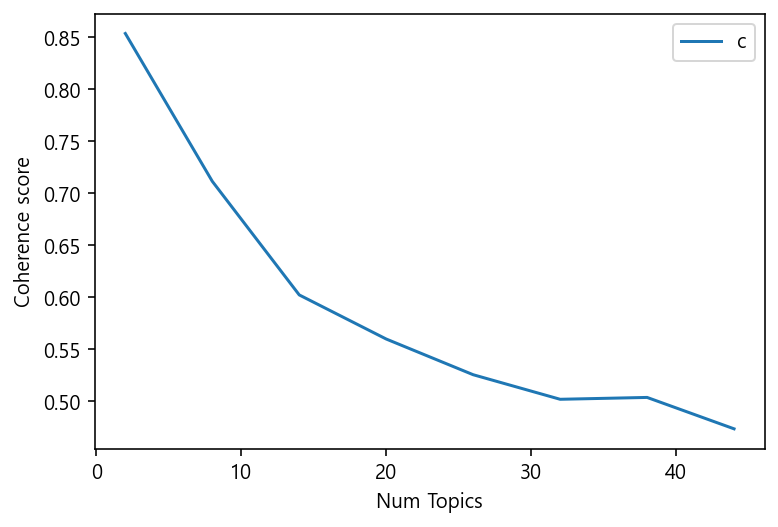

In [222]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim 
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v', processes=-1)
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('../data/아동복_블로그_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기
try:
    # do something
    find_optimal_number_of_topics(dictionary, corpus, processed_data)
except IOError as e:
    print('ooops, check the attributes of e to see precisely what happened.')
    if e.errno != 23:
        print('I don\'t know how to handle this')
        raise

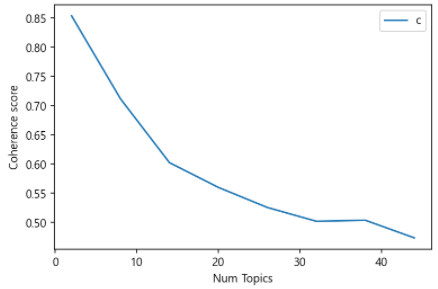

In [223]:
import gensim
NUM_TOPICS = 14 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2021-11-03 22:19:59,618 : INFO : using symmetric alpha at 0.07142857142857142
2021-11-03 22:19:59,620 : INFO : using symmetric eta at 0.07142857142857142
2021-11-03 22:19:59,621 : INFO : using serial LDA version on this node
2021-11-03 22:19:59,626 : INFO : running online (multi-pass) LDA training, 14 topics, 15 passes over the supplied corpus of 8911 documents, updating model once every 2000 documents, evaluating perplexity every 8911 documents, iterating 50x with a convergence threshold of 0.001000
2021-11-03 22:19:59,627 : INFO : PROGRESS: pass 0, at document #2000/8911
2021-11-03 22:20:00,332 : INFO : merging chang

2021-11-03 22:20:03,193 : INFO : topic #2 (0.071): 0.024*"가지" + 0.020*"블랙" + 0.018*"포인트" + 0.017*"핑크" + 0.017*"선택" + 0.016*"색상" + 0.014*"로고" + 0.013*"착용" + 0.013*"블루" + 0.012*"아이템"
2021-11-03 22:20:03,194 : INFO : topic #3 (0.071): 0.039*"모노" + 0.038*"그램" + 0.020*"라인" + 0.016*"투맨" + 0.015*"착용" + 0.014*"럭셔리" + 0.013*"사용" + 0.013*"주니어" + 0.013*"프리미엄" + 0.013*"하복"
2021-11-03 22:20:03,194 : INFO : topic #7 (0.071): 0.033*"바지" + 0.032*"소재" + 0.015*"부분" + 0.012*"양말" + 0.012*"체크" + 0.012*"스커트" + 0.012*"착용" + 0.012*"블라우스" + 0.011*"진짜" + 0.011*"신축"
2021-11-03 22:20:03,195 : INFO : topic #0 (0.071): 0.078*"매장" + 0.021*"아동" + 0.015*"창고" + 0.015*"옷가게" + 0.014*"판매" + 0.014*"코트" + 0.014*"여기" + 0.014*"상품" + 0.010*"의류" + 0.010*"여성"
2021-11-03 22:20:03,196 : INFO : topic diff=0.286880, rho=0.393582
2021-11-03 22:20:03,198 : INFO : PROGRESS: pass 1, at document #6000/8911
2021-11-03 22:20:03,610 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:03,612 : INFO : 

2021-11-03 22:20:05,902 : INFO : topic #11 (0.071): 0.031*"배송" + 0.024*"만원" + 0.023*"주문" + 0.023*"구매" + 0.021*"상품" + 0.020*"오늘" + 0.020*"할인" + 0.017*"신상" + 0.013*"이상" + 0.013*"소개"
2021-11-03 22:20:05,904 : INFO : topic #10 (0.071): 0.038*"시간" + 0.024*"때문" + 0.016*"길이" + 0.015*"이용" + 0.014*"처음" + 0.014*"코로나" + 0.014*"확인" + 0.011*"시기" + 0.011*"조금" + 0.011*"공주"
2021-11-03 22:20:05,905 : INFO : topic #6 (0.071): 0.037*"사진" + 0.022*"제작" + 0.019*"자체" + 0.015*"가입" + 0.014*"구매" + 0.014*"회원" + 0.014*"금액" + 0.013*"사용" + 0.012*"쿠폰" + 0.012*"생각"
2021-11-03 22:20:05,906 : INFO : topic diff=0.237770, rho=0.366236
2021-11-03 22:20:06,143 : INFO : -7.365 per-word bound, 164.9 perplexity estimate based on a held-out corpus of 911 documents with 9154 words
2021-11-03 22:20:06,144 : INFO : PROGRESS: pass 2, at document #8911/8911
2021-11-03 22:20:06,319 : INFO : merging changes from 911 documents into a model of 8911 documents
2021-11-03 22:20:06,321 : INFO : topic #3 (0.071): 0.031*"라인" + 0.023*"공룡" + 0

2021-11-03 22:20:08,582 : INFO : topic #9 (0.071): 0.055*"아기" + 0.022*"남대문" + 0.020*"내복" + 0.018*"쇼핑" + 0.017*"가격" + 0.016*"사람" + 0.014*"이제" + 0.013*"시장" + 0.013*"상가" + 0.012*"진짜"
2021-11-03 22:20:08,583 : INFO : topic #10 (0.071): 0.042*"시간" + 0.026*"때문" + 0.019*"이용" + 0.016*"코로나" + 0.015*"확인" + 0.014*"처음" + 0.014*"길이" + 0.014*"조금" + 0.012*"선택" + 0.011*"주소"
2021-11-03 22:20:08,584 : INFO : topic #3 (0.071): 0.044*"모노" + 0.043*"그램" + 0.030*"라인" + 0.030*"투맨" + 0.021*"주니어" + 0.020*"패턴" + 0.020*"하복" + 0.016*"트레이닝복" + 0.016*"럭셔리" + 0.016*"니트"
2021-11-03 22:20:08,584 : INFO : topic diff=0.167000, rho=0.325205
2021-11-03 22:20:08,585 : INFO : PROGRESS: pass 4, at document #4000/8911
2021-11-03 22:20:08,915 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:08,917 : INFO : topic #8 (0.071): 0.056*"모자" + 0.035*"패션" + 0.029*"스타" + 0.027*"팬츠" + 0.026*"아이템" + 0.024*"완성" + 0.022*"머리" + 0.021*"조거" + 0.018*"촬영" + 0.017*"가방"
2021-11-03 22:20:08,918 : INFO : t

2021-11-03 22:20:10,997 : INFO : topic #3 (0.071): 0.037*"라인" + 0.031*"모노" + 0.030*"투맨" + 0.030*"그램" + 0.025*"패턴" + 0.022*"주니어" + 0.020*"가디건" + 0.018*"하복" + 0.017*"색감" + 0.015*"분위기"
2021-11-03 22:20:10,998 : INFO : topic #7 (0.071): 0.052*"소재" + 0.048*"바지" + 0.021*"치마" + 0.018*"세탁" + 0.016*"체크" + 0.014*"원단" + 0.013*"편이" + 0.013*"조금" + 0.013*"착용" + 0.012*"블라우스"
2021-11-03 22:20:10,999 : INFO : topic diff=0.093872, rho=0.309263
2021-11-03 22:20:11,000 : INFO : PROGRESS: pass 5, at document #8000/8911
2021-11-03 22:20:11,329 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:11,331 : INFO : topic #9 (0.071): 0.051*"아기" + 0.031*"남대문" + 0.019*"쇼핑" + 0.019*"시장" + 0.018*"가격" + 0.018*"내복" + 0.016*"사람" + 0.013*"진짜" + 0.013*"한번" + 0.013*"상가"
2021-11-03 22:20:11,333 : INFO : topic #11 (0.071): 0.030*"배송" + 0.025*"만원" + 0.025*"주문" + 0.022*"오늘" + 0.022*"구매" + 0.022*"신상" + 0.021*"상품" + 0.021*"할인" + 0.014*"이상" + 0.014*"오픈"
2021-11-03 22:20:11,334 : INFO : top

2021-11-03 22:20:13,402 : INFO : topic #1 (0.071): 0.027*"리스" + 0.022*"요즘" + 0.021*"선물" + 0.020*"청바지" + 0.020*"레깅스" + 0.017*"남자" + 0.016*"자켓" + 0.015*"활동" + 0.015*"여자" + 0.015*"준비"
2021-11-03 22:20:13,404 : INFO : topic #13 (0.071): 0.063*"부분" + 0.042*"소매" + 0.031*"살짝" + 0.030*"허리" + 0.023*"보리" + 0.021*"정도" + 0.019*"라인" + 0.018*"포인트" + 0.018*"기장" + 0.017*"후드"
2021-11-03 22:20:13,405 : INFO : topic diff=0.078416, rho=0.295456
2021-11-03 22:20:13,406 : INFO : PROGRESS: pass 7, at document #2000/8911
2021-11-03 22:20:13,736 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:13,739 : INFO : topic #1 (0.071): 0.041*"리스" + 0.021*"요즘" + 0.019*"선물" + 0.018*"레깅스" + 0.016*"청바지" + 0.016*"자켓" + 0.016*"준비" + 0.015*"남자" + 0.015*"활동" + 0.014*"여자"
2021-11-03 22:20:13,740 : INFO : topic #4 (0.071): 0.047*"포스팅" + 0.040*"둘째" + 0.040*"작성" + 0.034*"직구" + 0.029*"제공" + 0.027*"후기" + 0.023*"거기" + 0.023*"첫째" + 0.020*"로부터" + 0.020*"미니"
2021-11-03 22:20:13,741 : INFO : to

2021-11-03 22:20:15,764 : INFO : topic #3 (0.071): 0.039*"모노" + 0.038*"그램" + 0.037*"라인" + 0.031*"투맨" + 0.023*"주니어" + 0.023*"하복" + 0.022*"베이직" + 0.021*"패턴" + 0.019*"심플" + 0.019*"가디건"
2021-11-03 22:20:15,765 : INFO : topic diff=0.066148, rho=0.272615
2021-11-03 22:20:15,766 : INFO : PROGRESS: pass 8, at document #6000/8911
2021-11-03 22:20:16,082 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:16,084 : INFO : topic #10 (0.071): 0.047*"시간" + 0.032*"때문" + 0.018*"코로나" + 0.018*"이용" + 0.016*"조금" + 0.015*"처음" + 0.015*"확인" + 0.014*"문의" + 0.014*"공주" + 0.013*"저희"
2021-11-03 22:20:16,084 : INFO : topic #0 (0.071): 0.112*"매장" + 0.023*"여기" + 0.019*"코트" + 0.018*"가격" + 0.016*"창고" + 0.016*"구경" + 0.014*"여성" + 0.014*"판매" + 0.014*"방문" + 0.013*"옷가게"
2021-11-03 22:20:16,085 : INFO : topic #3 (0.071): 0.040*"라인" + 0.033*"투맨" + 0.031*"모노" + 0.030*"그램" + 0.026*"패턴" + 0.023*"주니어" + 0.021*"가디건" + 0.020*"하복" + 0.019*"심플" + 0.018*"베이직"
2021-11-03 22:20:16,086 : INFO : t

2021-11-03 22:20:18,129 : INFO : topic diff=0.054730, rho=0.263017
2021-11-03 22:20:18,343 : INFO : -7.138 per-word bound, 140.8 perplexity estimate based on a held-out corpus of 911 documents with 9154 words
2021-11-03 22:20:18,344 : INFO : PROGRESS: pass 9, at document #8911/8911
2021-11-03 22:20:18,487 : INFO : merging changes from 911 documents into a model of 8911 documents
2021-11-03 22:20:18,489 : INFO : topic #13 (0.071): 0.065*"부분" + 0.043*"소매" + 0.033*"살짝" + 0.030*"허리" + 0.024*"보리" + 0.020*"라인" + 0.019*"후드" + 0.018*"포인트" + 0.018*"여유" + 0.018*"기장"
2021-11-03 22:20:18,490 : INFO : topic #2 (0.071): 0.033*"핑크" + 0.027*"가지" + 0.026*"로고" + 0.025*"색상" + 0.024*"선택" + 0.023*"블랙" + 0.022*"포인트" + 0.015*"화이트" + 0.014*"블루" + 0.014*"아이보리"
2021-11-03 22:20:18,491 : INFO : topic #11 (0.071): 0.029*"배송" + 0.028*"신상" + 0.025*"만원" + 0.023*"주문" + 0.022*"오늘" + 0.022*"상품" + 0.020*"할인" + 0.019*"구매" + 0.015*"런레빗" + 0.015*"소개"
2021-11-03 22:20:18,491 : INFO : topic #0 (0.071): 0.091*"매장" + 0.028*"코트

2021-11-03 22:20:20,510 : INFO : topic diff=0.071975, rho=0.246516
2021-11-03 22:20:20,511 : INFO : PROGRESS: pass 11, at document #4000/8911
2021-11-03 22:20:20,806 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:20,808 : INFO : topic #12 (0.071): 0.049*"등원" + 0.035*"마음" + 0.028*"어린이집" + 0.023*"활동" + 0.023*"사랑" + 0.021*"준비" + 0.021*"아들" + 0.016*"기도" + 0.016*"매일" + 0.016*"요즘"
2021-11-03 22:20:20,809 : INFO : topic #13 (0.071): 0.064*"부분" + 0.044*"소매" + 0.034*"보리" + 0.032*"살짝" + 0.030*"허리" + 0.020*"여유" + 0.019*"후드" + 0.017*"포인트" + 0.016*"정도" + 0.016*"기장"
2021-11-03 22:20:20,810 : INFO : topic #10 (0.071): 0.048*"시간" + 0.030*"때문" + 0.018*"이용" + 0.016*"조금" + 0.015*"코로나" + 0.015*"확인" + 0.014*"문의" + 0.013*"선택" + 0.013*"공주" + 0.013*"저희"
2021-11-03 22:20:20,811 : INFO : topic #4 (0.071): 0.046*"포스팅" + 0.042*"작성" + 0.038*"둘째" + 0.031*"직구" + 0.028*"제공" + 0.024*"거기" + 0.024*"후기" + 0.023*"로부터" + 0.021*"첫째" + 0.019*"지원"
2021-11-03 22:20:20,812 : INFO : 

2021-11-03 22:20:22,784 : INFO : PROGRESS: pass 12, at document #8000/8911
2021-11-03 22:20:23,093 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:23,096 : INFO : topic #10 (0.071): 0.048*"시간" + 0.033*"때문" + 0.018*"이용" + 0.018*"코로나" + 0.017*"조금" + 0.014*"저희" + 0.014*"확인" + 0.014*"처음" + 0.014*"공주" + 0.012*"시기"
2021-11-03 22:20:23,097 : INFO : topic #8 (0.071): 0.050*"모자" + 0.044*"팬츠" + 0.035*"패션" + 0.031*"아이템" + 0.029*"양말" + 0.028*"신발" + 0.024*"조거" + 0.023*"스타" + 0.021*"완성" + 0.020*"매치"
2021-11-03 22:20:23,097 : INFO : topic #0 (0.071): 0.102*"매장" + 0.023*"여기" + 0.022*"코트" + 0.020*"가격" + 0.019*"구경" + 0.018*"창고" + 0.016*"옷가게" + 0.015*"방문" + 0.014*"여성" + 0.013*"판매"
2021-11-03 22:20:23,098 : INFO : topic #3 (0.071): 0.040*"라인" + 0.031*"투맨" + 0.028*"모노" + 0.027*"패턴" + 0.027*"주니어" + 0.025*"그램" + 0.021*"심플" + 0.021*"가디건" + 0.021*"베이직" + 0.020*"하복"
2021-11-03 22:20:23,099 : INFO : topic #4 (0.071): 0.047*"포스팅" + 0.043*"직구" + 0.040*"작성" + 0.035*"둘째" 

2021-11-03 22:20:25,040 : INFO : topic diff=0.045790, rho=0.232775
2021-11-03 22:20:25,041 : INFO : PROGRESS: pass 14, at document #2000/8911
2021-11-03 22:20:25,354 : INFO : merging changes from 2000 documents into a model of 8911 documents
2021-11-03 22:20:25,356 : INFO : topic #6 (0.071): 0.027*"사진" + 0.025*"사용" + 0.020*"제작" + 0.018*"구매" + 0.018*"쿠폰" + 0.017*"자체" + 0.015*"진행" + 0.015*"금액" + 0.015*"생각" + 0.014*"적용"
2021-11-03 22:20:25,357 : INFO : topic #4 (0.071): 0.047*"포스팅" + 0.044*"둘째" + 0.040*"작성" + 0.035*"직구" + 0.029*"제공" + 0.026*"후기" + 0.023*"거기" + 0.022*"첫째" + 0.021*"로부터" + 0.019*"미니"
2021-11-03 22:20:25,358 : INFO : topic #8 (0.071): 0.049*"모자" + 0.038*"팬츠" + 0.032*"아이템" + 0.031*"패션" + 0.031*"양말" + 0.026*"신발" + 0.025*"스타" + 0.023*"완성" + 0.021*"머리" + 0.020*"매치"
2021-11-03 22:20:25,359 : INFO : topic #10 (0.071): 0.049*"시간" + 0.031*"때문" + 0.020*"이용" + 0.018*"코로나" + 0.016*"조금" + 0.016*"저희" + 0.015*"확인" + 0.014*"선택" + 0.012*"공주" + 0.012*"정리"
2021-11-03 22:20:25,360 : INFO : topi

(0, '0.092*"매장" + 0.027*"코트" + 0.024*"여기" + 0.020*"가격"')
(1, '0.031*"리스" + 0.022*"요즘" + 0.019*"선물" + 0.019*"레깅스"')
(2, '0.033*"핑크" + 0.029*"로고" + 0.027*"가지" + 0.026*"색상"')
(3, '0.042*"라인" + 0.032*"투맨" + 0.026*"하복" + 0.025*"모노"')
(4, '0.045*"포스팅" + 0.043*"직구" + 0.040*"둘째" + 0.038*"작성"')
(5, '0.043*"의류" + 0.042*"쇼핑몰" + 0.034*"아동" + 0.030*"남매"')
(6, '0.028*"사진" + 0.024*"사용" + 0.021*"제작" + 0.019*"구매"')
(7, '0.051*"소재" + 0.051*"바지" + 0.023*"치마" + 0.021*"원단"')
(8, '0.047*"모자" + 0.041*"팬츠" + 0.032*"패션" + 0.031*"아이템"')
(9, '0.054*"아기" + 0.026*"남대문" + 0.022*"쇼핑" + 0.020*"내복"')
(10, '0.048*"시간" + 0.031*"때문" + 0.021*"이용" + 0.018*"코로나"')
(11, '0.028*"신상" + 0.028*"배송" + 0.025*"만원" + 0.023*"주문"')
(12, '0.046*"등원" + 0.036*"마음" + 0.026*"어린이집" + 0.022*"활동"')
(13, '0.067*"부분" + 0.044*"소매" + 0.034*"살짝" + 0.031*"허리"')


In [226]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [227]:
pyLDAvis.save_html(vis, '../files/네이버블로그_아동복.html')

C:\Users\Kim\AppData\Roaming\Python\Python37\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
